## Thuật toán đơn giản phân lớp dựa trên câu hỏi

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

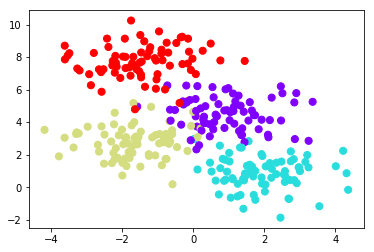

In [8]:
X,y=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

# Decision trees

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier().fit(X,y)

In [19]:
def visualize_classifier(model,X,y,ax=None,cmap="rainbow"):
    ax=ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    # fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    print("xx.shape",xx.shape)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    print("Z.shape",Z.shape)
    print(np.c_[xx.ravel(), yy.ravel()].shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap, clim=(y.min(), y.max()),
    zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    

xx.shape (200, 200)
Z.shape (200, 200)
(40000, 2)


/home/lill/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


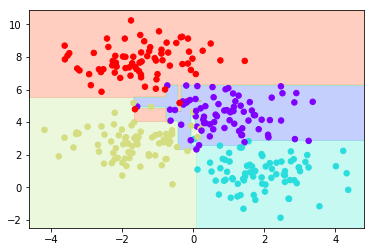

In [20]:
visualize_classifier(DecisionTreeClassifier(), X, y)

# Random trees

Là sự kết hợp(baging) từ nhiều trees (overfit tree, tree bình thường,...) mục đích để lấy dự đoán trung bình giữa các tree để dự đoán
Ở đây ta dùng 80% dữ liệu để tạo bootrap

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


xx.shape (200, 200)
Z.shape (200, 200)
(40000, 2)


/home/lill/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


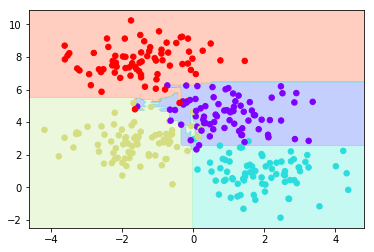

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
#tao bootrap 
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

Việc optimize để chọn được tham số tốt nhất cho forest tree được thực hiện bằng hàm RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

xx.shape (200, 200)
Z.shape (200, 200)
(40000, 2)


/home/lill/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


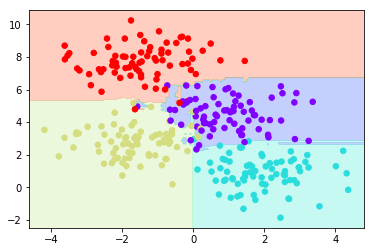

In [23]:
# n_estimators là số tree muốn tạo, random_State là giá trị bắt đầu cho mội lần chọn data cho bootrap
model=RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(model,X,y)

# Random Forest Regression

Ta xét cho dữ liệu liên tục

In [25]:
rs=np.random.RandomState(42)
x=10*rs.rand(200)
print(x.shape)

(200,)


In [26]:
def model(x,sigma=0.3):
    sinmain1=np.sin(5*x)
    sinmain2=np.sin(0.5*x)
    noise=sigma*rs.rand(len(x))
    
    return sinmain1+sinmain2+noise
    

<ErrorbarContainer object of 3 artists>

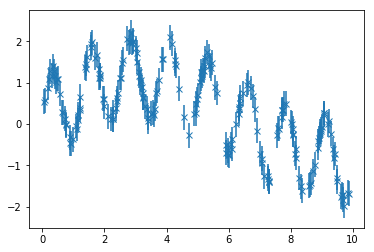

In [33]:
y=model(x)
plt.errorbar(x,y,0.3,fmt="x")

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

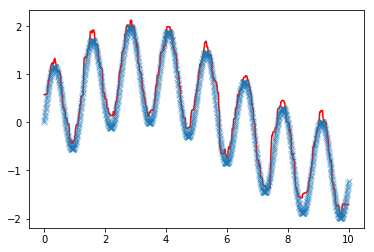

In [40]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
# plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-x', alpha=0.5);